In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(-90, 90, size=1500)
lngs = np.random.uniform(-180, 180, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
#add lat and longs to a list
coordinates = list(lat_lngs)
len(coordinates)

1500

In [4]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for (lat,lng) in coordinates:
    city = citipy.nearest_city(lat, lng).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

612

In [5]:
cities

['yar-sale',
 'nemuro',
 'sisimiut',
 'ushuaia',
 'mataura',
 'albany',
 'bojnurd',
 'axim',
 'bluff',
 'rikitea',
 'east london',
 'jabiru',
 'mayo',
 'hithadhoo',
 'punta arenas',
 'cabo san lucas',
 'hualmay',
 'tiksi',
 'presidencia roque saenz pena',
 'riyadh',
 'faanui',
 'flinders',
 'kodiak',
 'teahupoo',
 'antakya',
 'atuona',
 'vaitupu',
 'barrow',
 'oxford',
 'vaini',
 'ilulissat',
 'castro',
 'khatanga',
 'jackson',
 'belushya guba',
 'meulaboh',
 'lebu',
 'isangel',
 'waingapu',
 'saskylakh',
 'new norfolk',
 'tabou',
 'audincourt',
 'boyuibe',
 'butaritari',
 'pogranichnyy',
 'sur',
 'hasaki',
 'bambanglipuro',
 'upata',
 'puerto ayora',
 'lasa',
 'tumannyy',
 'saint-philippe',
 'mumford',
 'nelson bay',
 'lompoc',
 'thompson',
 'carnarvon',
 'mount gambier',
 'pevek',
 'redlands',
 'saleaula',
 'ribeira grande',
 'mrirt',
 'namibe',
 'cabedelo',
 'tasiilaq',
 'broome',
 'karema',
 'port alfred',
 'cherskiy',
 'amurzet',
 'ostrovnoy',
 'hobart',
 'port-cartier',
 'hermanu

In [6]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [7]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | yar-sale
Processing Record 2 of Set 1 | nemuro
Processing Record 3 of Set 1 | sisimiut
Processing Record 4 of Set 1 | ushuaia
Processing Record 5 of Set 1 | mataura
Processing Record 6 of Set 1 | albany
Processing Record 7 of Set 1 | bojnurd
Processing Record 8 of Set 1 | axim
Processing Record 9 of Set 1 | bluff
Processing Record 10 of Set 1 | rikitea
Processing Record 11 of Set 1 | east london
Processing Record 12 of Set 1 | jabiru
City not found. Skipping...
Processing Record 13 of Set 1 | mayo
Processing Record 14 of Set 1 | hithadhoo
Processing Record 15 of Set 1 | punta arenas
Processing Record 16 of Set 1 | cabo san lucas
Processing Record 17 of Set 1 | hualmay
Processing Record 18 of Set 1 | tiksi
Processing Record 19 of Set 1 | presidencia roque saenz pena
Processing Record 20 of Set 1 | riyadh
Processing Record 21 of Set 1 | faanui
Processing Record 22 of Set 1 | flinders
Processing Rec

Processing Record 35 of Set 4 | flin flon
Processing Record 36 of Set 4 | pacific grove
Processing Record 37 of Set 4 | bengkulu
Processing Record 38 of Set 4 | cape town
Processing Record 39 of Set 4 | skeldon
Processing Record 40 of Set 4 | touros
Processing Record 41 of Set 4 | chokurdakh
Processing Record 42 of Set 4 | attawapiskat
City not found. Skipping...
Processing Record 43 of Set 4 | half moon bay
Processing Record 44 of Set 4 | prince rupert
Processing Record 45 of Set 4 | murgab
Processing Record 46 of Set 4 | bahia honda
Processing Record 47 of Set 4 | fernie
Processing Record 48 of Set 4 | bergen
Processing Record 49 of Set 4 | victoria
Processing Record 50 of Set 4 | mahebourg
Processing Record 1 of Set 5 | qasigiannguit
Processing Record 2 of Set 5 | berikulskiy
City not found. Skipping...
Processing Record 3 of Set 5 | san quintin
Processing Record 4 of Set 5 | nadym
Processing Record 5 of Set 5 | avera
Processing Record 6 of Set 5 | lixourion
Processing Record 7 of S

Processing Record 24 of Set 8 | sokoni
Processing Record 25 of Set 8 | umm lajj
Processing Record 26 of Set 8 | auka
Processing Record 27 of Set 8 | ternate
Processing Record 28 of Set 8 | aberdeen
Processing Record 29 of Set 8 | gurupi
Processing Record 30 of Set 8 | georgetown
Processing Record 31 of Set 8 | mezen
Processing Record 32 of Set 8 | narsaq
Processing Record 33 of Set 8 | puerto cabezas
Processing Record 34 of Set 8 | dunedin
Processing Record 35 of Set 8 | esfahan
Processing Record 36 of Set 8 | ongandjera
Processing Record 37 of Set 8 | izumo
Processing Record 38 of Set 8 | nanortalik
Processing Record 39 of Set 8 | ozernovskiy
Processing Record 40 of Set 8 | milingimbi
City not found. Skipping...
Processing Record 41 of Set 8 | la asuncion
Processing Record 42 of Set 8 | egvekinot
Processing Record 43 of Set 8 | banepa
Processing Record 44 of Set 8 | umuahia
Processing Record 45 of Set 8 | honiara
Processing Record 46 of Set 8 | aras
Processing Record 47 of Set 8 | buc

Processing Record 15 of Set 12 | kudahuvadhoo
Processing Record 16 of Set 12 | wewak
Processing Record 17 of Set 12 | sao francisco
Processing Record 18 of Set 12 | kesennuma
City not found. Skipping...
Processing Record 19 of Set 12 | port blair
Processing Record 20 of Set 12 | cheshire
Processing Record 21 of Set 12 | roma
Processing Record 22 of Set 12 | parral
Processing Record 23 of Set 12 | whyalla
Processing Record 24 of Set 12 | maldaeni
Processing Record 25 of Set 12 | morgan city
Processing Record 26 of Set 12 | olafsvik
Processing Record 27 of Set 12 | pochutla
Processing Record 28 of Set 12 | grindavik
Processing Record 29 of Set 12 | krasnousolskiy
City not found. Skipping...
Processing Record 30 of Set 12 | oskemen
Processing Record 31 of Set 12 | leningradskiy
Processing Record 32 of Set 12 | venice
Processing Record 33 of Set 12 | yangambi
Processing Record 34 of Set 12 | qaqortoq
Processing Record 35 of Set 12 | san patricio
Processing Record 36 of Set 12 | vanderhoof


In [8]:
len(city_data)

561

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(20)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Yar-Sale,66.8333,70.8333,4.01,94,39,13.24,RU,2022-01-24 03:58:42
1,Nemuro,43.3236,145.5750,27.03,64,91,8.55,JP,2022-01-24 03:58:42
2,Sisimiut,66.9395,-53.6735,16.56,68,100,22.19,GL,2022-01-24 03:58:43
3,Ushuaia,-54.8000,-68.3000,46.06,81,75,21.85,AR,2022-01-24 03:58:43
4,Mataura,-46.1927,168.8643,70.27,35,7,6.76,NZ,2022-01-24 03:58:43
5,Albany,42.6001,-73.9662,22.80,85,88,1.01,US,2022-01-24 03:54:55
6,Bojnurd,37.4747,57.3290,17.55,86,0,0.00,IR,2022-01-24 03:58:44
7,Axim,4.8699,-2.2405,76.32,89,4,1.86,GH,2022-01-24 03:58:44
8,Bluff,-46.6000,168.3333,56.07,62,33,7.61,NZ,2022-01-24 03:58:45
9,Rikitea,-23.1203,-134.9692,78.21,73,100,16.35,PF,2022-01-24 03:58:45


In [12]:
#reorder the columns
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]

In [16]:
city_data_df.tail(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
551,Beauvais,FR,2022-01-24 04:14:57,49.4167,2.0000,35.80,97,0,1.14
552,Lerwick,GB,2022-01-24 04:14:57,60.1545,-1.1494,48.20,92,100,20.07
553,Corinth,GR,2022-01-24 04:14:58,37.9407,22.9573,38.41,62,85,6.73
554,Port-Gentil,GA,2022-01-24 04:14:58,-0.7193,8.7815,79.03,80,14,7.38
555,Corowa,AU,2022-01-24 04:14:58,-36.0333,146.3833,89.58,31,100,6.71
556,Talcahuano,CL,2022-01-24 04:14:59,-36.7167,-73.1167,58.68,88,0,11.50
557,Baykit,RU,2022-01-24 04:14:59,61.6700,96.3700,3.43,96,100,1.36
558,Saint Helens,GB,2022-01-24 04:15:00,53.4500,-2.7333,38.62,86,100,3.00
559,Tsagan Aman,RU,2022-01-24 04:15:00,47.5639,46.7218,26.15,90,100,15.10
560,Miandrivazo,MG,2022-01-24 04:15:01,-19.5167,45.4667,81.82,62,98,4.65


In [15]:
#output to CSV
output_data_file = "weather_data/cities.csv"
#export to CSV
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [17]:
#extract fields for plotting
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

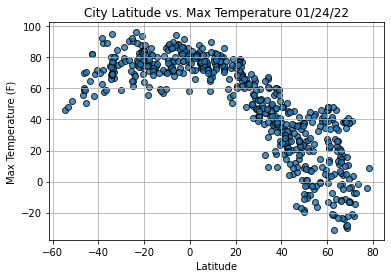

In [23]:
#Build the scatter plot for latitude vs. max temperature
plt.scatter(lats,
            max_temps,
            edgecolor="black",
            linewidths=1,
            marker="o",
            alpha=0.8,
            label="Cities")
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/latmaxtemp.png")


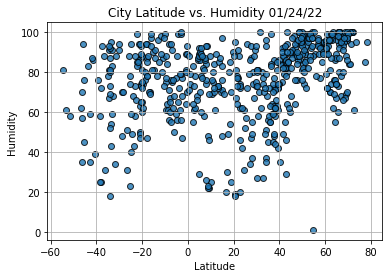

In [24]:
#Build the scatter plot for latitude vs. humidity
plt.scatter(lats,
            humidity,
            edgecolor="black",
            linewidths=1,
            marker="o",
            alpha=0.8,
            label="Cities")
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/lathumidity.png")

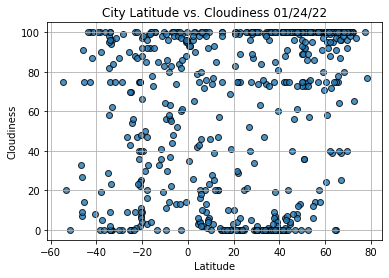

In [26]:
#Build the scatter plot for latitude vs. cloudiness
plt.scatter(lats,
            cloudiness,
            edgecolor="black",
            linewidths=1,
            marker="o",
            alpha=0.8,
            label="Cities")
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/latcloudiness.png")

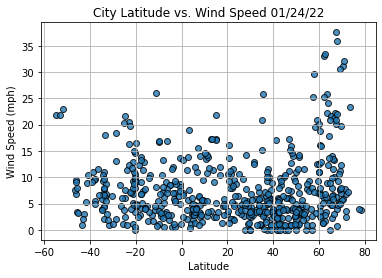

In [27]:
#Build the scatter plot for latitude vs. wind speed
plt.scatter(lats,
            wind_speed,
            edgecolor="black",
            linewidths=1,
            marker="o",
            alpha=0.8,
            label="Cities")
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/latwindspeed.png")